In [3]:
import pandas as pd
import numpy as np
from GlassBox.figs.figs_utils import FIGSGridSearch
from imodels import FIGSRegressor
%reload_ext autoreload
%autoreload 2

# Grid-search

In [4]:
FIGS_parameter = dict(
    max_rules= [5,10,15,20,25],
    max_trees=[2,3,4,5,6,7,8,9,10],
    min_impurity_decrease=[0.1, 0.2, 0.3],
)

gs = FIGSGridSearch(path_dataset="../../outputs/scores.csv", task="Regressor", random_state=841)
best_ = gs.grid_search(FIGSModel=FIGSRegressor, hyperparameters=FIGS_parameter)
gs.save_model_parameters(best_[0],best_[1], name="model_regressor")

100%|██████████| 135/135 [07:49<00:00,  3.48s/it, nDCG=0.794]


# Metric evalutation

In [5]:
best_model, parameters = gs.load_model_parameters(name="model_regressor")
best_model,parameters

(FIGSRegressor(max_rules=20, max_trees=7, min_impurity_decrease=0.1),
 {'max_rules': 20, 'max_trees': 7, 'min_impurity_decrease': 0.1})

In [6]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1,10,15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1,10,15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1,10,15])

display(pd.DataFrame([nDCG_train,nDCG_valid,nDCG_test],index=["Training","Validation","Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.7965,0.8240,0.8153
Validation,0.8306,0.8044,0.7937
Test,0.8113,0.8149,0.8036


## Example of Job-offer

In [7]:
qId = 1
job_curricula = gs.test[gs.test["qId"] == qId]

y_pred = best_model.predict(np.asarray(job_curricula.iloc[:, 2:13]))

y_pred = pd.DataFrame(y_pred, index=job_curricula.index, columns=["lambdas"])
dt_final = pd.merge(job_curricula, y_pred, left_index=True, right_index=True)

In [8]:
dt_final.sort_values("labels", ascending=False)["labels"].head(15)

791     4
1496    4
1224    3
955     3
1338    3
968     3
1086    3
1269    3
877     3
1120    3
790     3
1018    3
1401    3
945     3
1118    3
Name: labels, dtype: int64

In [9]:
dt_final.sort_values("lambdas",ascending=False)["labels"].head(15)

1398    3
791     4
1430    2
1190    3
1475    2
759     3
1120    3
1070    3
935     2
1171    2
1418    3
971     2
1335    2
1416    2
1244    3
Name: labels, dtype: int64

In [10]:
print(best_model)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
Skills <= 0.292 (Tree #0 root)
	Salary <= 0.900 (split)
		Val: 0.276 (leaf)
		Skills <= 0.100 (split)
			Val: 0.315 (leaf)
			Val: 0.386 (leaf)
	Skills <= 0.708 (split)
		Val: 0.462 (leaf)
		Val: 0.588 (leaf)

	+
Language <= 0.475 (Tree #1 root)
	Language <= 0.118 (split)
		Val: -0.017 (leaf)
		Val: 0.024 (leaf)
	Language <= 0.812 (split)
		Val: 0.055 (leaf)
		Val: 0.115 (leaf)

	+
Education <= 0.900 (Tree #2 root)
	Education <= 0.700 (split)
		Education <= 0.500 (split)
			Val: -0.102 (leaf)
			Val: -0.060 (leaf)
		Val: -0.021 (leaf)
	City <= 0.661 (split)
		Val: 0.008 (leaf)
		Val: 0.026 (leaf)

	+
Age <= 0.500 (Tree #3 root)
	Val: -0.033 (leaf)
	Age <= 0.929 (split)
		Val: 0.003 (leaf)
		Val: 0.021 (leaf)

	+
SoftSkills <= 0.100 (Tr

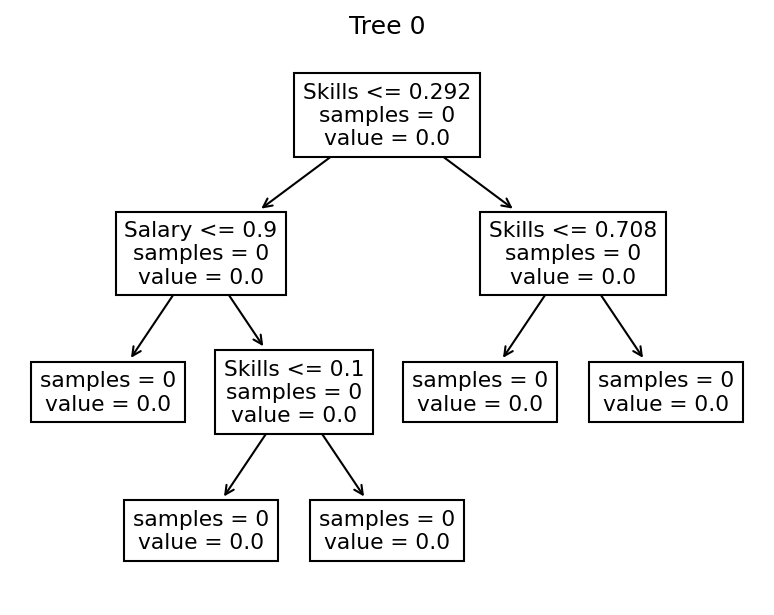

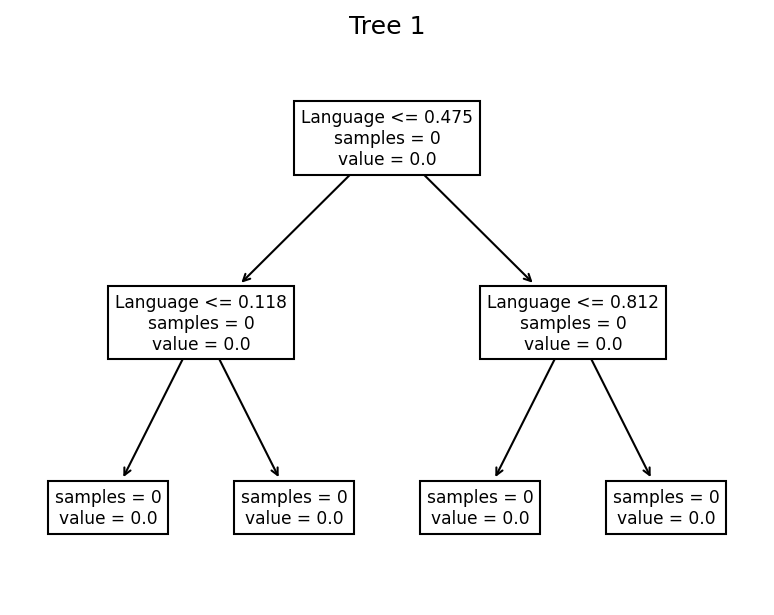

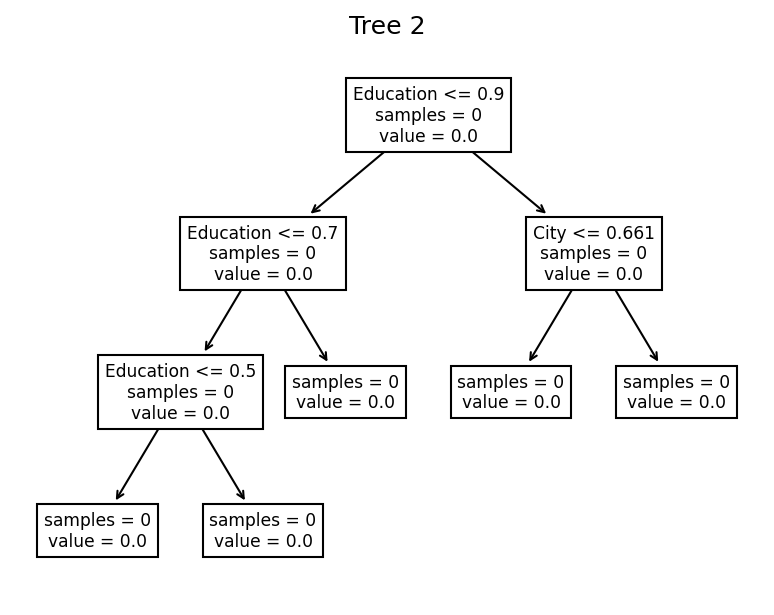

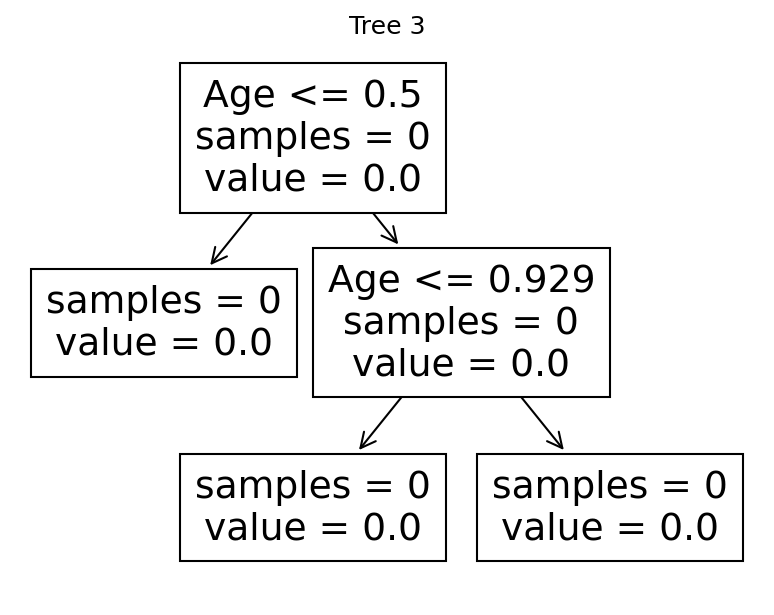

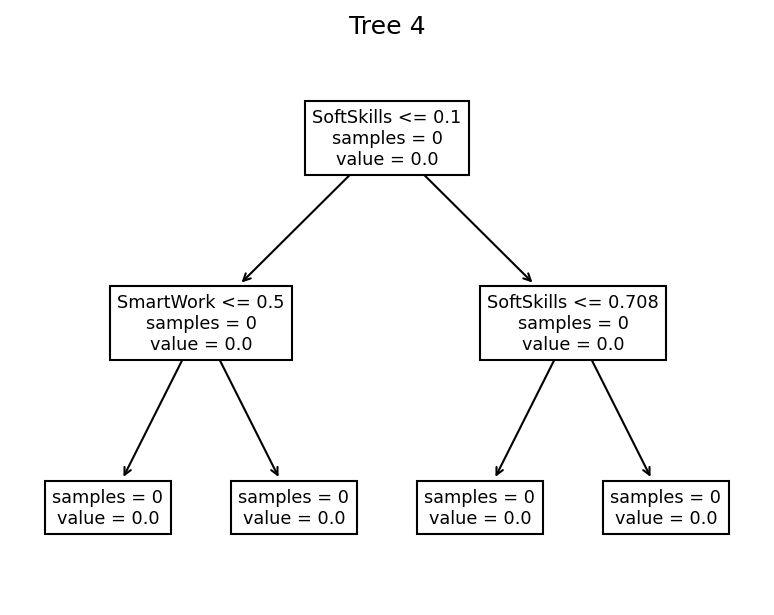

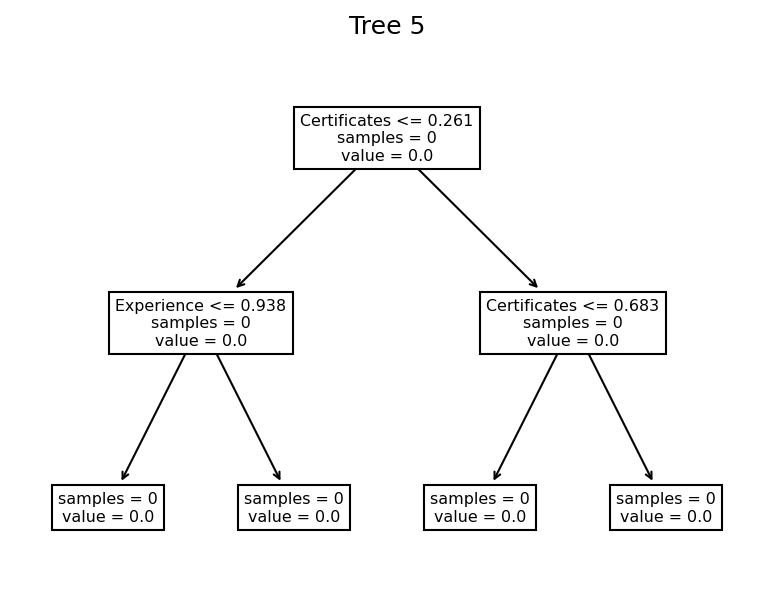

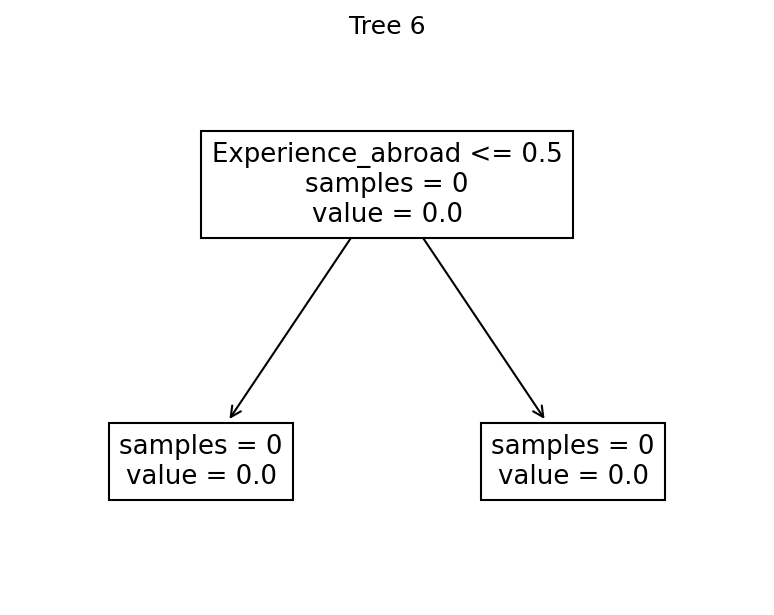

In [11]:
for i in range(len(best_model.trees_)):
    best_model.plot(feature_names=gs.feature_name,  tree_number=i)  